<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project5/blob/main/Prediction_2020_2023_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this file we calculate the prediction from 2020 untill the end of 2023, based in the values from 01/2017 until 12/2019. The goal was to observe which values we would obtain, in case covid hadn't happened. So basically, first we calculated a test size and a train size. Second we decided which model (ARIMA, SARIMA, Exponential smoothing or linear regression+seasonality) had the smaller mean square error (MSE). Third we used that model with the train set, to predict the values from 2020 to 2023. Notes:

* Our real values dataset is from 01/2017 untill X/2022.
* The model used in this case was the linear regression for the trend and the avg of the months for seasonality.
*   Then we will have to predict future values from X/2022 untill 12/2023, based in the values from 01/2020 untill X/2022 (file Prediction 2022-2023 (2).ipynb) and also on the values from 01/2017 untill X/2022 (file Prediction 2022-2023 (3).ipynb). For this we will have to create a new test and train set for each scenario, then train and test in all the models above and choose the one with smaller MSE to predict the values for the future time range.



In [ ]:
import pandas as pd

In [ ]:
link = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/final_date.csv'
df = pd.read_csv(link)

In [ ]:
df=df.iloc[:36] #filter the data until end of 2019

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) #transforming Date from string to Datetime

In [ ]:
df.set_index('Date', inplace=True) #setting date as index

In [ ]:
#Defining the test si<e and the train size
test_size_percentage = 0.25 #9 months (from April to December 2019)
test_size = int(test_size_percentage * df.shape[0]) #9 lines
train_size_initial = df.shape[0] - test_size #27 lines

train_set = df['sleeps'].iloc[:train_size_initial] #1st 27 months
test_set = df['sleeps'].iloc[train_size_initial:] #last 9 months of 2019

In [ ]:
# length check
print(train_set.shape[0] + test_set.shape[0] == df.shape[0])

True


Calculate the mean square error on the ARIMA

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

auto_arima(train_set) #What was this for? A: To obtain the best order, written bellow.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def arima_forecast(tme_sries):
  arima = ARIMA(tme_sries, order=(3, 0, 2)).fit()  #I obtained the values order() in auto_arima
  return arima.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: arima_forecast(df['sleeps'].iloc[:train_size_initial + n]))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

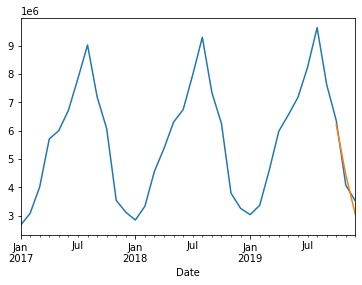

In [ ]:
df['sleeps'].plot()
evaluation_df.set_index(test_set.index)['forecast'].iloc[evaluation_df.shape[0] -12:].plot() #DOUBT:

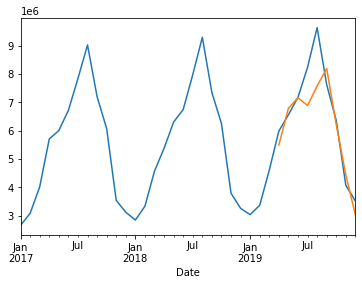

In [ ]:
df['sleeps'].plot()
#test_set.plot()
evaluation_df.set_index(test_set.index)['forecast'].plot() #DOUBT: 

In [ ]:
#EXPONENTIAL SMOOTHING
#DOUBT
from statsmodels.tsa.api import ExponentialSmoothing
def expsm_forecast(tme_sries):
  es = ExponentialSmoothing(tme_sries).fit(smoothing_level=0.1)
  return es.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: expsm_forecast(df['sleeps'].iloc[:train_size_initial + n])) #to do: a list of decimals in smoothing_level, the minor mse wins (hyper tunning). / Works in Gridsearch?

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

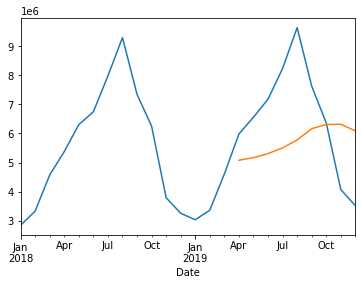

In [ ]:
df['sleeps'].iloc[df.shape[0] - 60:].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].iloc[evaluation_df.shape[0] - 60:].plot()

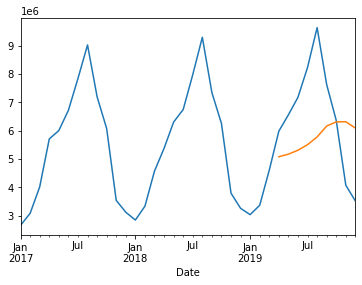

In [ ]:
df['sleeps'].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].plot()

Seasonal Decompose

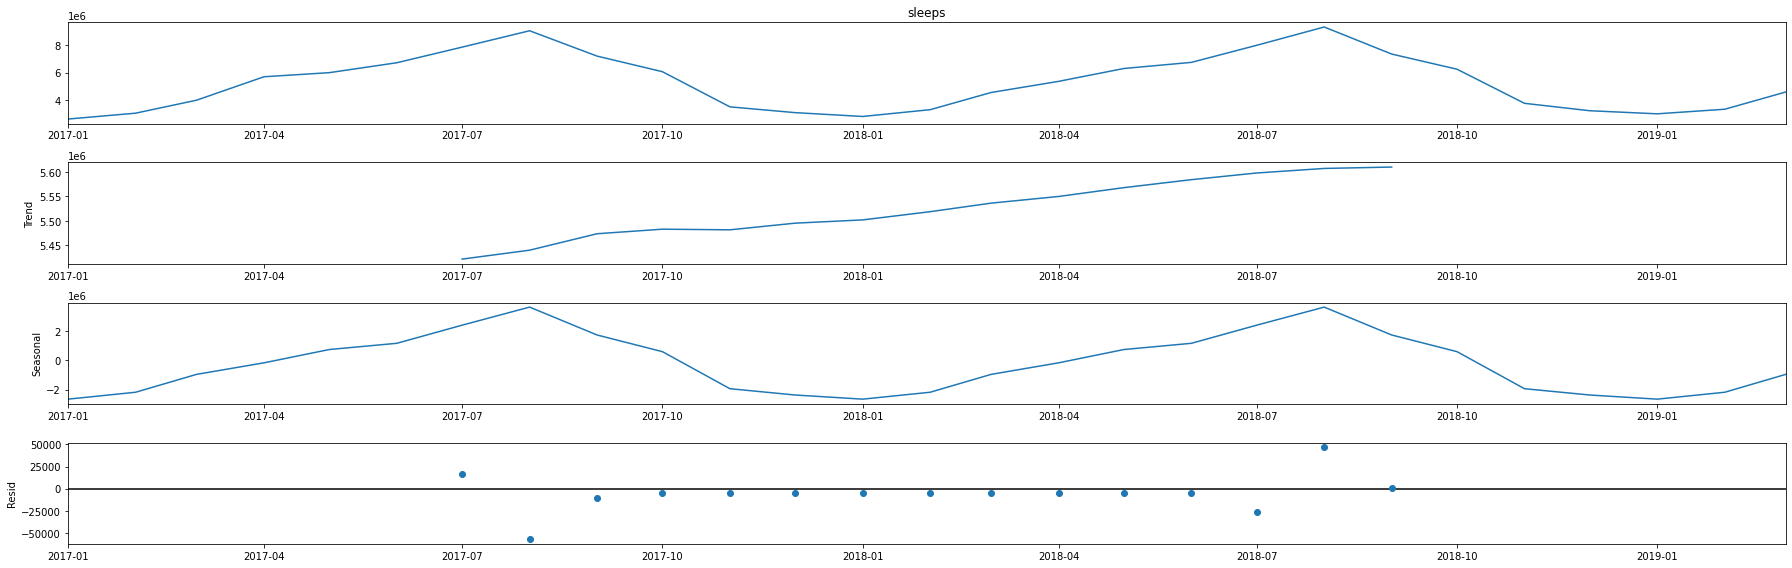

In [ ]:
#Seasonal decompose of the train set
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 25, 8

decomposition = sm.tsa.seasonal_decompose(x = train_set, period = 12, model='additive')
fig = decomposition.plot()
plt.show()

#Doubt: Why the trend finishes earlier than the end of the dataset?

In [ ]:
#decomposition.trend
type(decomposition.trend)

pandas.core.series.Series

In [ ]:
#passar os valores da trend para dataframe
df_trend=decomposition.trend.to_frame()

In [ ]:
#pass test values to dataframe
df_test_set=test_set.to_frame()

In [ ]:
#insert an ID to the trend months
df_trend.insert(0, 'ID_trend', range(0, len(df_trend)))

In [ ]:
#insert an ID to the test_set months
df_test_set.insert(0, 'ID_test', range(27, 27+len(df_test_set)))

In [ ]:
#transform the trend dataset in the same format of test_set dataset, removing Date from index
df_test_set.reset_index(inplace=True)


In [ ]:
df_test_set


,Date,ID_test,sleeps
0,2019-04-01,27,5981300
1,2019-05-01,28,6557840
2,2019-06-01,29,7177554
3,2019-07-01,30,8231230
4,2019-08-01,31,9633427
5,2019-09-01,32,7624574
6,2019-10-01,33,6358685
7,2019-11-01,34,4071968
8,2019-12-01,35,3515940


In [ ]:
df_trend

,ID_trend,trend
Date,,
2017-01-01,0,NaN
2017-02-01,1,NaN
2017-03-01,2,NaN
2017-04-01,3,NaN
2017-05-01,4,NaN
2017-06-01,5,NaN
2017-07-01,6,5.421557e+06
2017-08-01,7,5.439788e+06
2017-09-01,8,5.473412e+06


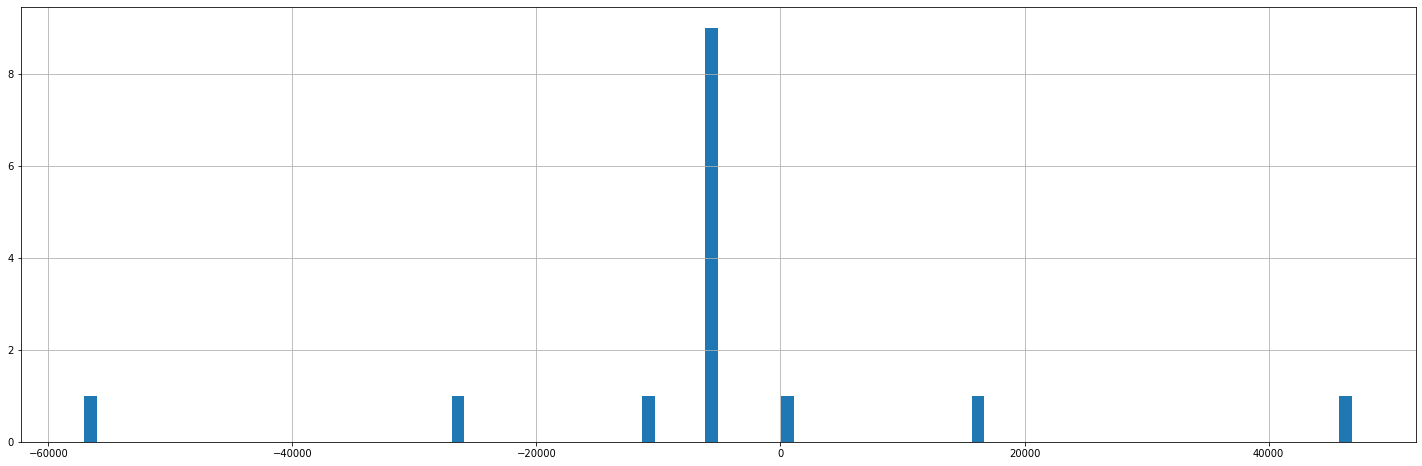

In [ ]:
#Residuals analysis
#decomposition.resid.describe()
#decomposition.resid.plot()
decomposition.resid.hist(bins=100) #DOUBT: Confirm with cristina if the more frequent number (-5000) is a problem

Apply linear regression to the trend

In [ ]:
#Since the linear regression doens't work with NANs, we should clean first the NANs values from the trend.
df_trend.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
X = df_trend[['ID_trend']]
y = df_trend['trend']

modelLR2 = LinearRegression().fit(X, y)

X1 = df_test_set[['ID_test']]
y_pred = pd.Series(modelLR2.predict(X1), index=X1.index)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ID_test
Feature names seen at fit time, yet now missing:
- ID_trend

  warnings.warn(message, FutureWarning)


In [ ]:
df_y_pred = y_pred.to_frame()

In [ ]:
df_y_pred.insert(1, 'month', range(4, 13))
#f_y_pred.drop(['month'], axis=1, inplace=True)

In [ ]:
df_y_pred.rename(columns = {0:'Prediction_Trend'}, inplace = True)
df_y_pred

,Prediction_Trend,month
0,5.711839e+06,4
1,5.725228e+06,5
2,5.738617e+06,6
3,5.752006e+06,7
4,5.765395e+06,8
5,5.778784e+06,9
6,5.792173e+06,10
7,5.805562e+06,11
8,5.818951e+06,12


Seasonality

In [ ]:
link = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/seasonality%20(1).csv' #DF da Ana acerca da seasonality do ano tipo - média por cada mês, desde 2017 a 2018
df_season = pd.read_csv(link)

In [ ]:
df_season

,Unnamed: 0,months,seasonality_avg
0,0,1,-2.652846e+06
1,1,2,-2.180746e+06
2,2,3,-9.597565e+05
3,3,4,-1.698994e+05
4,4,5,7.395022e+05
5,5,6,1.164328e+06
6,6,7,2.403603e+06
7,7,8,3.638949e+06
8,8,9,1.732175e+06
9,9,10,5.937622e+05


In [ ]:
df_season.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#Turn df_season the same size as df_test, so we can concat

df_season_test=df_season.iloc[3:12]
df_season_test.reset_index(inplace=True, drop=True)
df_season_test

,months,seasonality_avg
0,4,-1.698994e+05
1,5,7.395022e+05
2,6,1.164328e+06
3,7,2.403603e+06
4,8,3.638949e+06
5,9,1.732175e+06
6,10,5.937622e+05
7,11,-1.938821e+06
8,12,-2.370250e+06


In [ ]:
df_y_pred

,Prediction_Trend,month
0,5.711839e+06,4
1,5.725228e+06,5
2,5.738617e+06,6
3,5.752006e+06,7
4,5.765395e+06,8
5,5.778784e+06,9
6,5.792173e+06,10
7,5.805562e+06,11
8,5.818951e+06,12


In [ ]:
#13 digitos MSE - 2017 a 2022 - modelo: sarima
#13 digitos MSE - 2020 a 2022 - modelo: sarima

In [ ]:
df_final = pd.concat([df_season_test, df_y_pred], axis=1)
df_final.drop(['months'], axis=1, inplace=True)
df_final['Sum']=df_final['seasonality_avg']+df_final['Prediction_Trend']
df_final

,seasonality_avg,Prediction_Trend,month,Sum
0,-1.698994e+05,5.711839e+06,4,5.541939e+06
1,7.395022e+05,5.725228e+06,5,6.464730e+06
2,1.164328e+06,5.738617e+06,6,6.902945e+06
3,2.403603e+06,5.752006e+06,7,8.155609e+06
4,3.638949e+06,5.765395e+06,8,9.404344e+06
5,1.732175e+06,5.778784e+06,9,7.510959e+06
6,5.937622e+05,5.792173e+06,10,6.385935e+06
7,-1.938821e+06,5.805562e+06,11,3.866741e+06
8,-2.370250e+06,5.818951e+06,12,3.448701e+06


In [ ]:
#Calculate the mean square error, to compare with the other methods and choose the smaller one
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test_set['sleeps'], df_final['Sum']) #11 digitos, logo inferior a 13 digitos obtidos pelo SARIMA (Luisa Policarpo)

43956094240.16943

Since this method of predicting values, got a smaller MSE than the other methods (arima, sarima and exponential smoothing), we should use it to predict the values from 01/01/2020 untill 01/12/2023 - this will be the scenario of predicted values if Covid hadn't happen.
The method used was: linear regression to predict the trend and monthly avg to predict the seasonality. The final predicted values, will be the sum of this two.

In [ ]:
prediction_index = [number for number in range(36, 84)] # 36(01/01/2020) a 81(01/12/2023)

In [ ]:
prediction_index = pd.DataFrame(prediction_index)

In [ ]:
prediction_index['Date'] = pd.date_range(start='1/1/2020', periods=len(prediction_index), freq='MS')
prediction_index.rename(columns = {0:'months'}, inplace = True)

In [ ]:
prediction_index

,months,Date
0,36,2020-01-01
1,37,2020-02-01
2,38,2020-03-01
3,39,2020-04-01
4,40,2020-05-01
5,41,2020-06-01
6,42,2020-07-01
7,43,2020-08-01
8,44,2020-09-01
9,45,2020-10-01


In [ ]:
from sklearn.linear_model import LinearRegression
X = df_trend[['ID_trend']]
y = df_trend['trend']

modelLR2 = LinearRegression().fit(X, y)

X2 = prediction_index[['months']]
y_pred_trend_2023 = pd.Series(modelLR2.predict(X2), index=X2.index) #DOUBT: What is the index=X2.index for?

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- months
Feature names seen at fit time, yet now missing:
- ID_trend

  warnings.warn(message, FutureWarning)


In [ ]:
df_pred_trend_2023 = y_pred_trend_2023.to_frame() 

In [ ]:
df_pred_trend_2023['Date'] = prediction_index['Date'] #all trend predicted values from the trend since 01/01/2020 untill 01/12/2023

In [ ]:
df_pred_trend_2023['months'] =  prediction_index['months']
df_pred_trend_2023

,0,Date,months
0,5.832340e+06,2020-01-01,36
1,5.845730e+06,2020-02-01,37
2,5.859119e+06,2020-03-01,38
3,5.872508e+06,2020-04-01,39
4,5.885897e+06,2020-05-01,40
5,5.899286e+06,2020-06-01,41
6,5.912675e+06,2020-07-01,42
7,5.926064e+06,2020-08-01,43
8,5.939453e+06,2020-09-01,44
9,5.952842e+06,2020-10-01,45


In [ ]:
df_pred_trend_2023.rename(columns = {0:'Pred_Trend'}, inplace = True)

In [ ]:
#Obtain the seasonality predicted values from 01/01/2020 untill 01/12/2023, to sum with the trend and obtain the final predicted values of all dataset

In [ ]:
df_season_2020_2021 = pd.concat([df_season, df_season], axis=0)
df_season_2020_2023 = pd.concat([df_season_2020_2021, df_season_2020_2021], axis=0)
df_season_2020_2023

,months,seasonality_avg
0,1,-2.652846e+06
1,2,-2.180746e+06
2,3,-9.597565e+05
3,4,-1.698994e+05
4,5,7.395022e+05
5,6,1.164328e+06
6,7,2.403603e+06
7,8,3.638949e+06
8,9,1.732175e+06
9,10,5.937622e+05


In [ ]:
df_season_2020_2023.reset_index(inplace=True, drop=True)
df_season_2020_2023

,months,seasonality_avg
0,1,-2.652846e+06
1,2,-2.180746e+06
2,3,-9.597565e+05
3,4,-1.698994e+05
4,5,7.395022e+05
5,6,1.164328e+06
6,7,2.403603e+06
7,8,3.638949e+06
8,9,1.732175e+06
9,10,5.937622e+05


In [ ]:
df_finalpred_2020_2023 = df_season_2020_2023
df_finalpred_2020_2023['Trend_LR'] = df_pred_trend_2023['Pred_Trend']
df_finalpred_2020_2023['Overnight_Pred'] = df_season_2020_2023['seasonality_avg'] + df_finalpred_2020_2023['Trend_LR']
df_finalpred_2020_2023

,months,seasonality_avg,Trend_LR,Overnight_Pred
0,1,-2.652846e+06,5.832340e+06,3.179494e+06
1,2,-2.180746e+06,5.845730e+06,3.664983e+06
2,3,-9.597565e+05,5.859119e+06,4.899362e+06
3,4,-1.698994e+05,5.872508e+06,5.702608e+06
4,5,7.395022e+05,5.885897e+06,6.625399e+06
5,6,1.164328e+06,5.899286e+06,7.063614e+06
6,7,2.403603e+06,5.912675e+06,8.316278e+06
7,8,3.638949e+06,5.926064e+06,9.565013e+06
8,9,1.732175e+06,5.939453e+06,7.671628e+06
9,10,5.937622e+05,5.952842e+06,6.546604e+06


Lineplot of prediction VS real data

In [ ]:
df_pred_trend_2023

In [ ]:
#df_real_2020_2022
#df_pred_2020_2022

df_pred_2020_2022=df_finalpred_2020_2023.iloc[0:35]
df_pred_2020_2022.drop(['months', 'seasonality_avg', 'Trend_LR'], axis=1, inplace=True)
df_date = df_pred_trend_2023.iloc[0:35]
df_date.drop(['months', 'Pred_Trend'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
link_2017_2022='https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/df_final_2017_2022.csv'
df_2017_2022 = pd.read_csv(link_2017_2022)
df_2017_2022_dates = df_2017_2022.tail(35)
df_2017_2022_dates.sort_values(by='Date', inplace=True)
df_2017_2022_dates.reset_index(inplace=True, drop=True)
df_2017_2022_dates.drop(['Date'], axis=1, inplace=True)
df_2017_2022_dates

In [ ]:
df_date = pd.concat([df_pred_2020_2022, df_date], axis=1)
df_date = pd.concat([df_date, df_2017_2022_dates], axis=1)
df_date.rename(columns={'sleeps': 'Overnight_Real'}, inplace=True, errors='raise')

In [ ]:
df_date.columns

Index(['Overnight_Pred', 'Date', 'Overnight_Real'], dtype='object')

In [ ]:
import plotly.express as px

fig = px.line(df_date, x='Date', y=['Overnight_Real', 'Overnight_Pred'])
fig.show()

Aplicar o mesmo raciocinio, utilizando agora a linear regression do modelo com os dados de 2020 a 2022. Quanto aos dados de 2017 a 2022, nao faz sentido testar o modelo da linnear regression, visto que a trend nao é constante.

In [ ]:
#1 Criar df com os dados de overnight entre 01/2020 até X/20222
#2 Criar um test e um train set
#3 Verificar neste train e test, em qual dos modelos (ARIMA, SARIMA, Exponential Smoothing e Linear Regression(Trend)+Avg(Seasonality)) obtemos o menor MSE (mean square error)
#4 O modelo com menor MSE, deverá ser o usado para prever os dados de 2023.